## ¿Qué es la regresión?

La regresión es una técnica de aprendizaje supervisado que se usa para predecir una variable continua basada en una o más variables independientes.  
El objetivo principal es encontrar una relación matemática entre las variables que permita hacer predicciones precisas.

### Ejemplo práctico:

- Predicción del precio de una vivienda en función de su tamaño, ubicación y número de habitaciones.
- Estimación del consumo de electricidad basado en la temperatura y la hora del día.

### Ejemplo gráfico:

En la imagen siguiente se observa cómo la regresión lineal encuentra la mejor línea de ajuste para los puntos de datos:

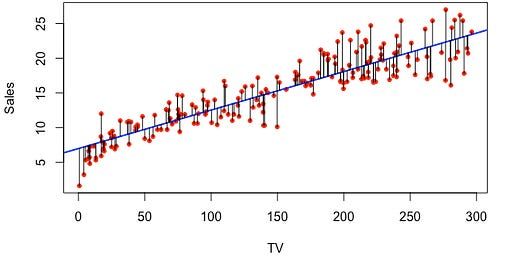


# Tipos de Regresión Más Comunes

## Regresión Lineal
Es el modelo más simple de regresión. Busca la mejor línea recta que minimiza la diferencia entre los valores predichos y los valores reales.

### Fórmula de la regresión lineal simple:

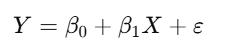

Donde:

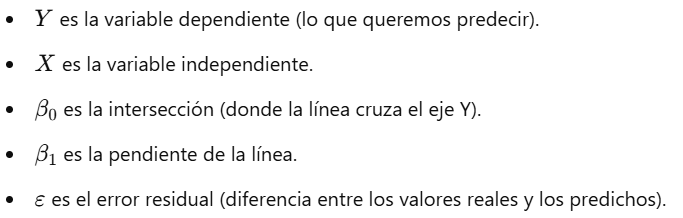



## Regresión Múltiple
Es una extensión de la regresión lineal, pero con más de una variable independiente. Se usa cuando hay múltiples factores que afectan la variable dependiente.

### Fórmula de la regresión múltiple:

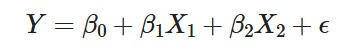

Donde:

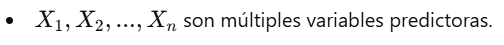

### Ejemplo práctico:
- Predecir el precio de una casa basado en tamaño, número de habitaciones, ubicación y edad del inmueble.

### Ejemplo gráfico:
En este caso, al tener múltiples variables independientes, los datos pueden formar un plano en lugar de una línea.

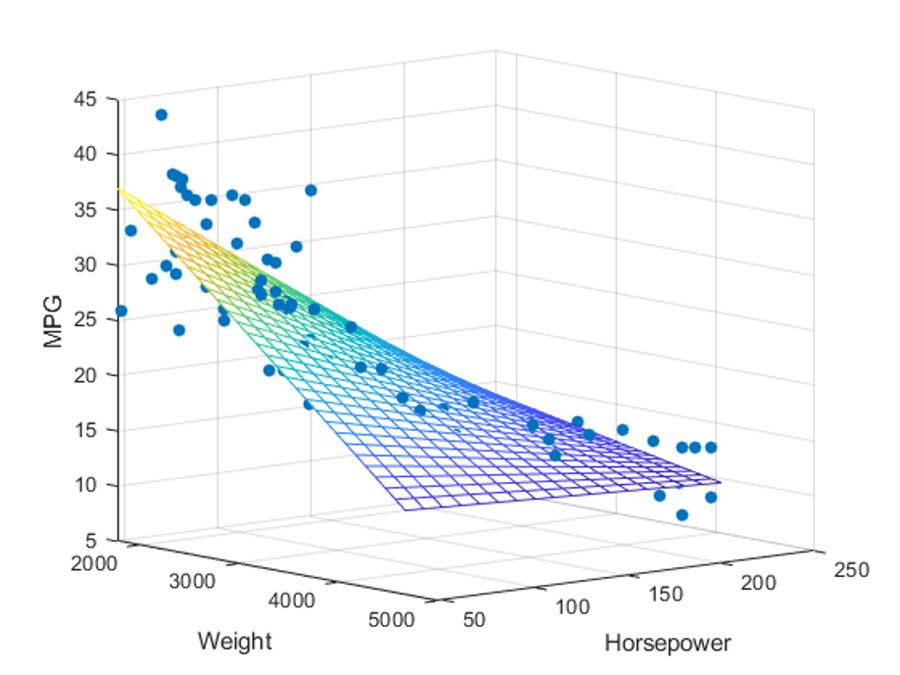

In [309]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris


In [310]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [311]:
X = df.drop(columns=['species', 'petal_length'])
y = df.petal_length

In [312]:
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

Cuando entrenamos un modelo de Machine Learning, el objetivo principal es que pueda hacer buenas predicciones en datos nuevos y desconocidos. Para evaluar si el modelo está generalizando bien y no simplemente "memorizando" los datos, dividimos el conjunto de datos en dos subconjuntos:

- Conjunto de entrenamiento (X_train, y_train)
- Conjunto de prueba (X_test, y_test)

¿ Cómo dividimos los datos ?

En train_test_split(), el argumento test_size=0.2 significa que el 20% de los datos se reserva para prueba y el 80% para entrenamiento.

Reglas generales para elegir test_size:

- 0.2 (20%): Es un valor común para conjuntos de datos grandes.
- 0.3 (30%): Puede ser útil si se tiene pocos datos y se quiere una evaluación más precisa.
- 0.1 (10%): En casos donde los datos son muy escasos, se puede reducir el tamaño de prueba.

| Entrenamiento: ████████████████████████████████████████████  (80%) |
| Prueba:        ████████                                      (20%) |


In [313]:
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las formas de los conjuntos resultantes
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

Datos de entrenamiento: (120, 3), (120,)
Datos de prueba: (30, 3), (30,)


In [314]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [315]:
y_pred = modelo.predict(X_test)

In [316]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': y_test - y_pred}) 
df_pred 

,Actual,Predicted,Error
73,4.7,4.127716,0.572284
18,1.7,1.882002,-0.182002
118,6.9,7.025659,-0.125659
78,4.5,4.432110,0.067890
76,4.8,4.927191,-0.127191
31,1.5,2.066237,-0.566237
64,3.6,3.849479,-0.249479
141,5.1,6.129499,-1.029499
68,4.5,5.021745,-0.521745
82,3.9,3.974453,-0.074453


In [317]:
print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")


Coeficientes: [ 0.72281463 -0.63581649  1.46752403]
Intercepto: -0.2621959025887062


## ¿Cómo validamos que la regresión es buena prediciendo?

Para evaluar la calidad de un modelo de regresión, utilizamos varias métricas, entre las cuales se incluyen:

- **Coeficiente de determinación (\( R^2 \))**: Indica qué tan bien se ajusta el modelo a los datos observados. Un valor de \( R^2 \) cercano a 1 indica un buen ajuste.

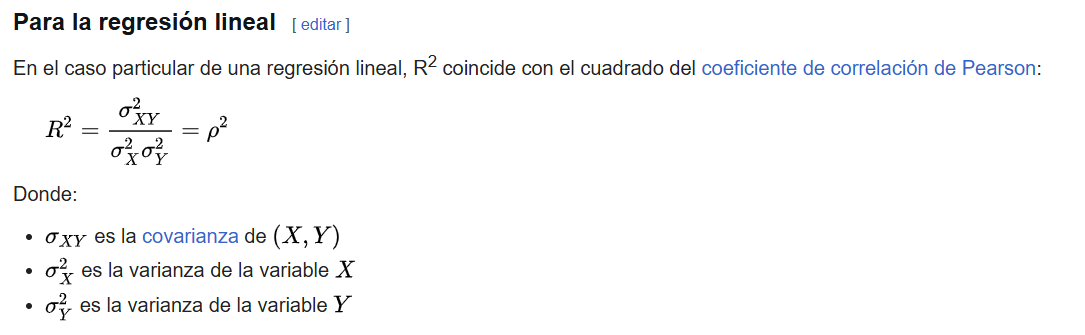

- **Error Cuadrático Medio (MSE)**: Mide el promedio de los cuadrados de los errores. Valores más bajos indican un mejor ajuste.
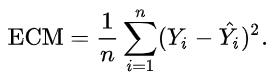

- **Raíz del Error Cuadrático Medio (RMSE)**: Es la raíz cuadrada del MSE y proporciona una medida de error en las mismas unidades que los datos originales.
- **Error Absoluto Medio (MAE)**: Mide el promedio de los errores absolutos. Valores más bajos indican un mejor ajuste.


In [318]:
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

Error Cuadrático Medio: 0.1300162603138268
R²: 0.9603293155857664


In [319]:
import statsmodels.api as sm

X = sm.add_constant(X) ## añadir una constante (intercepto) al modelo para evitar el sesgo

model = sm.OLS(y, X).fit()

summary = model.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1473.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          6.98e-109
Time:                        15:18:15   Log-Likelihood:                -39.408
No. Observations:                 150   AIC:                             86.82
Df Residuals:                     146   BIC:                             98.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2627      0.297     -0.883      0.379      -0.850       0.325
sepal_length     0.7291      0.058     12.502      0.000       0.614       0.844
sepal_width     -0.6460      0.068     -9.431      0.000      -0.781      -0.511
petal_width      1.4468      0.068     21.399      0.000       1.313       1.580
==============================================================================
Omnibus:                        2.520   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.391
Skew:                           0.073   Prob(JB):                        0.303
Kurtosis:                       3.601   Cond. No.                         79.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## P-Valor

El p-valor es una medida utilizada en pruebas de hipótesis estadísticas para determinar la significancia de los resultados obtenidos. En el contexto de un modelo de regresión, el p-valor se utiliza para evaluar la hipótesis nula de que el coeficiente de una variable independiente es igual a cero (es decir, que la variable no tiene efecto sobre la variable dependiente).

### Interpretación del P-Valor

- **P-Valor bajo (cercano a 0)**: Indica que hay una fuerte evidencia en contra de la hipótesis nula, lo que sugiere que la variable independiente tiene un efecto significativo sobre la variable dependiente. En general, un p-valor menor a 0.05 se considera estadísticamente significativo.
- **P-Valor alto**: Indica que no hay suficiente evidencia para rechazar la hipótesis nula, lo que sugiere que la variable independiente no tiene un efecto significativo sobre la variable dependiente.

### Ejemplo

Supongamos que estamos ajustando un modelo de regresión lineal y obtenemos los siguientes p-valores para nuestras variables independientes:

- **Variable 1**: p-valor = 0.001
- **Variable 2**: p-valor = 0.45
- **Variable 3**: p-valor = 0.03

En este caso, podemos interpretar que:

- **Variable 1** es altamente significativa (p-valor < 0.05).
- **Variable 2** no es significativa (p-valor > 0.05).
- **Variable 3** es significativa (p-valor < 0.05).

### Importancia del P-Valor

El p-valor es crucial para determinar la relevancia de las variables independientes en el modelo. Ayuda a identificar cuáles variables tienen un impacto significativo en la variable dependiente y cuáles no, lo que es esencial para construir modelos predictivos precisos y eficientes.

### Nota

Es importante recordar que un p-valor bajo no implica necesariamente una relación causal, sino simplemente una asociación estadística. Además, el umbral de significancia (como 0.05) es arbitrario y puede variar según el contexto del estudio.

In [320]:
X = sm.add_constant(X)

X['petal_width_2'] = X['petal_width']*X['sepal_width']
model = sm.OLS(y, X).fit()

summary = model.summary()
## Validar el valor p de la nueva variable, este es algo porque tiene una relevancia baja para el modelo.
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1102.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          2.17e-107
Time:                        15:18:15   Log-Likelihood:                -39.104
No. Observations:                 150   AIC:                             88.21
Df Residuals:                     145   BIC:                             103.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0086      0.445     -0.019      0.985      -0.889       0.872
sepal_length      0.7316      0.058     12.508      0.000       0.616       0.847
sepal_width      -0.7253      0.124     -5.849      0.000      -0.970      -0.480
petal_width       1.1883      0.344      3.459      0.001       0.509       1.867
petal_width_2     0.0800      0.104      0.767      0.444      -0.126       0.286
==============================================================================
Omnibus:                        2.634   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                2.574
Skew:                           0.065   Prob(JB):                        0.276
Kurtosis:                       3.629   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Al momento de entrar un modelo de regresion se pueden ir eliminando los valores más altos de p e ir evaluando cada vez, hasta tener solamente valores bajos de p

## Clasificación

La clasificación es una técnica de aprendizaje supervisado en la que el objetivo es predecir la categoría o clase a la que pertenece una observación dada, basada en un conjunto de características. A diferencia de la regresión, donde se predice un valor continuo, en la clasificación se predice una etiqueta discreta.

### Tipos de Clasificación

1. **Clasificación Binaria**: En la clasificación binaria, hay dos clases posibles. Por ejemplo, predecir si un correo electrónico es spam o no spam.
2. **Clasificación Multiclase**: En la clasificación multiclase, hay más de dos clases posibles. Por ejemplo, clasificar tipos de frutas como manzana, naranja o plátano.
3. **Clasificación Multietiqueta**: En la clasificación multietiqueta, cada observación puede pertenecer a múltiples clases simultáneamente. Por ejemplo, un documento puede estar etiquetado con múltiples temas.

### Modelos de Clasificación

Existen varios modelos de clasificación que se pueden utilizar dependiendo del problema y los datos disponibles. Algunos de los modelos más comunes son:

1. **Regresión Logística**: Es un modelo lineal utilizado para la clasificación binaria. Calcula la probabilidad de que una observación pertenezca a una clase particular utilizando la función sigmoide.

2. **Máquinas de Soporte Vectorial (SVM)**: SVM encuentra el hiperplano que mejor separa las clases en el espacio de características. Puede ser utilizado tanto para clasificación binaria como multiclase.

3. **Árboles de Decisión**: Un árbol de decisión es un modelo basado en reglas que divide el espacio de características en regiones homogéneas. Es fácil de interpretar y puede ser utilizado para clasificación binaria y multiclase.

4. **Bosques Aleatorios (Random Forest)**: Es un conjunto de árboles de decisión entrenados con diferentes subconjuntos de datos y características. Combina las predicciones de múltiples árboles para mejorar la precisión y reducir el sobreajuste.

5. **K-Vecinos Más Cercanos (K-NN)**: K-NN clasifica una observación basada en las clases de sus k vecinos más cercanos en el espacio de características. Es un modelo simple y no paramétrico.

6. **Redes Neuronales**: Las redes neuronales son modelos complejos que pueden capturar relaciones no lineales en los datos. Son especialmente útiles para problemas de clasificación con grandes conjuntos de datos y características.

7. **Naive Bayes**: Es un clasificador probabilístico basado en el teorema de Bayes. Asume que las características son independientes entre sí, lo cual puede no ser cierto en la práctica, pero aún así puede funcionar bien en muchos casos.

8. **Gradient Boosting**: Es una técnica de conjunto que construye modelos secuenciales, donde cada modelo intenta corregir los errores del modelo anterior. Ejemplos populares incluyen XGBoost, LightGBM y CatBoost.

### Evaluación de Modelos de Clasificación

Para evaluar la calidad de un modelo de clasificación, se utilizan varias métricas, entre las cuales se incluyen:

- **Precisión (Accuracy)**: Proporción de predicciones correctas sobre el total de predicciones.
- **Precisión (Precision)**: Proporción de verdaderos positivos sobre el total de predicciones positivas.
- **Sensibilidad (Recall)**: Proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos.
- **F1-Score**: Media armónica de la precisión y la sensibilidad.
- **Matriz de Confusión**: Tabla que muestra las predicciones correctas e incorrectas desglosadas por cada clase.
- **AUC-ROC**: Área bajo la curva ROC, que mide la capacidad del modelo para distinguir entre clases.

## Regresión Logística

La regresión logística es un modelo de clasificación utilizado para predecir la probabilidad de que una observación pertenezca a una clase particular. Es especialmente útil para problemas de clasificación binaria, aunque también puede extenderse a problemas de clasificación multiclase.

### Fundamentos de la Regresión Logística

A diferencia de la regresión lineal, que predice un valor continuo, la regresión logística predice la probabilidad de que una observación pertenezca a una clase particular. Utiliza la función sigmoide (logística) para transformar la salida de una combinación lineal de las características en una probabilidad.

La función sigmoide se define como:

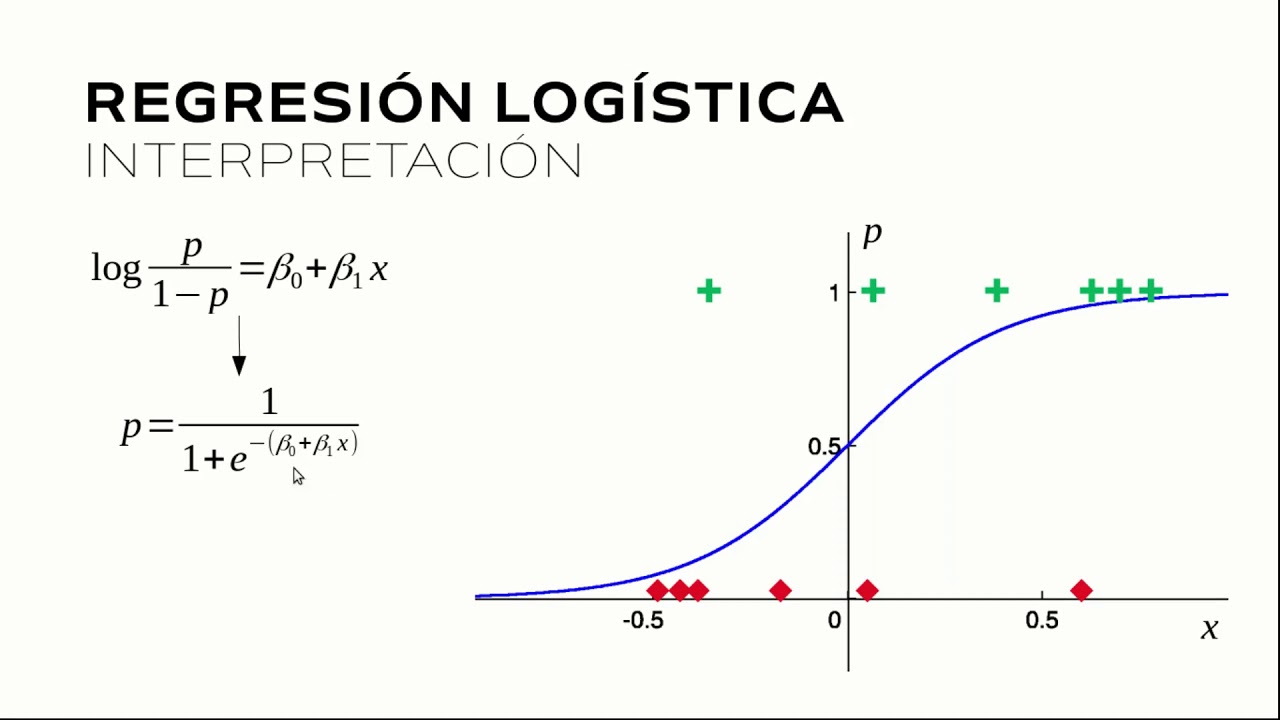

### Parámetros del Modelo

1. **Coeficientes (\( \beta \))**: Los coeficientes representan la relación entre cada característica y la variable dependiente. Un coeficiente positivo indica que un aumento en la característica aumenta la probabilidad de pertenecer a la clase positiva, mientras que un coeficiente negativo indica lo contrario.

2. **Intercepto (\( \beta_0 \))**: El intercepto es el valor de \( z \) cuando todas las características son cero. Representa el logaritmo de las probabilidades (log-odds) de la clase positiva cuando no hay otras características presentes.

3. **Regularización**: La regularización se utiliza para prevenir el sobreajuste del modelo. Los dos tipos más comunes de regularización son L1 (Lasso) y L2 (Ridge):
   - **L1 (Lasso)**: Penaliza la suma de los valores absolutos de los coeficientes. Puede llevar a coeficientes exactamente cero, lo que resulta en un modelo más simple.
   - **L2 (Ridge)**: Penaliza la suma de los cuadrados de los coeficientes. Tiende a reducir los coeficientes pero no los lleva exactamente a cero.

### Mejorar el Modelo de Regresión Logística

1. **Selección de Características**: Eliminar características irrelevantes o redundantes puede mejorar el rendimiento del modelo. Técnicas como la selección de características basada en la importancia de las características o el análisis de componentes principales (PCA) pueden ser útiles.

2. **Regularización**: Ajustar los parámetros de regularización (L1 o L2) puede ayudar a prevenir el sobreajuste y mejorar la generalización del modelo.

3. **Ingeniería de Características**: Crear nuevas características a partir de las existentes puede mejorar el rendimiento del modelo. Por ejemplo, crear interacciones entre características o transformar características no lineales.

4. **Balanceo de Clases**: Si las clases están desbalanceadas, técnicas como el sobremuestreo de la clase minoritaria, el submuestreo de la clase mayoritaria o el uso de técnicas de generación de datos sintéticos (como SMOTE) pueden mejorar el rendimiento del modelo.

5. **Ajuste de Hiperparámetros**: Utilizar técnicas de búsqueda de hiperparámetros como la búsqueda en cuadrícula (Grid Search) o la búsqueda aleatoria (Random Search) para encontrar los mejores parámetros del modelo.

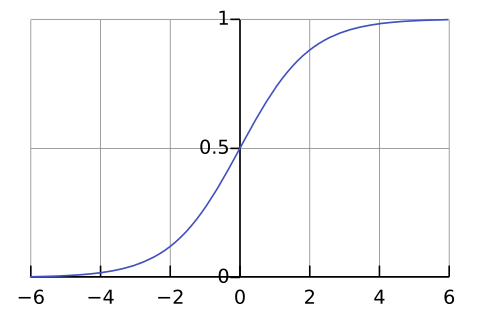

## Regresion Logistica (Dos Clases desbalanceadas)

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_twoClass = df[df['species'] != 'setosa']
## Desbalancero la clase intencionalmente
df_twoClass = df_twoClass.drop(df_twoClass[df_twoClass['species'] == 'virginica'].index[:45])

df_twoClass.species.value_counts()

species
versicolor    50
virginica      5
Name: count, dtype: int64

In [322]:
X = df_twoClass.drop(columns=['species'])
y = df_twoClass['species']

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [324]:
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

Datos de entrenamiento: (44, 4), (44,)
Datos de prueba: (11, 4), (11,)


In [325]:
modelo_log = LogisticRegression(max_iter=200)
modelo_log.fit(X_train, y_train)

y_pred = modelo_log.predict(X_test)

In [326]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df_pred 

,Actual,Predicted
81,versicolor,versicolor
55,versicolor,versicolor
82,versicolor,versicolor
63,versicolor,versicolor
69,versicolor,versicolor
99,versicolor,versicolor
91,versicolor,versicolor
76,versicolor,versicolor
93,versicolor,versicolor
62,versicolor,versicolor


In [327]:
11/12

0.9166666666666666

In [328]:
print(f"Precisión: {accuracy_score(y_test, y_pred)}")


Precisión: 0.9090909090909091


## confusion Matrix

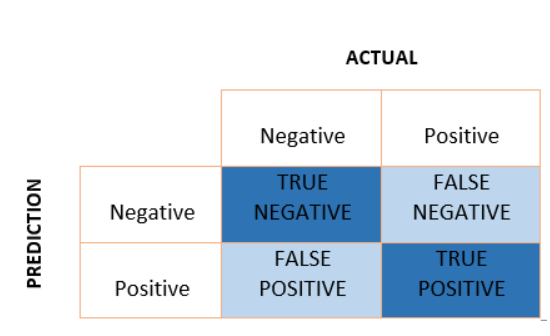

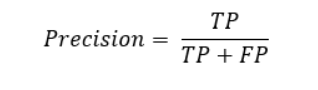

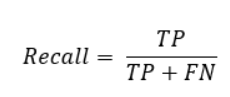

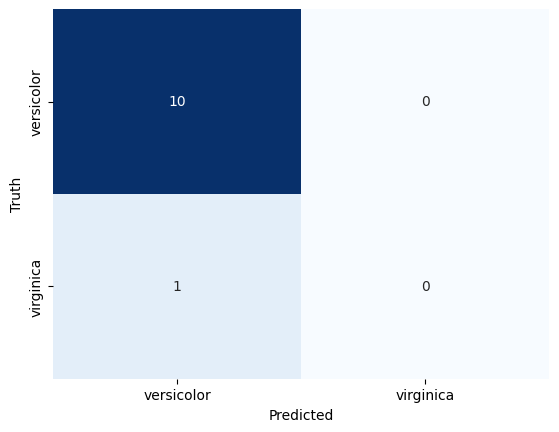

In [329]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['versicolor', 'virginica'], yticklabels=['versicolor', 'virginica'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [330]:
from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred, target_names=['versicolor', 'virginica']))

              precision    recall  f1-score   support

  versicolor       0.91      1.00      0.95        10
   virginica       0.00      0.00      0.00         1

    accuracy                           0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11



C:\Users\Thor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Thor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Thor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

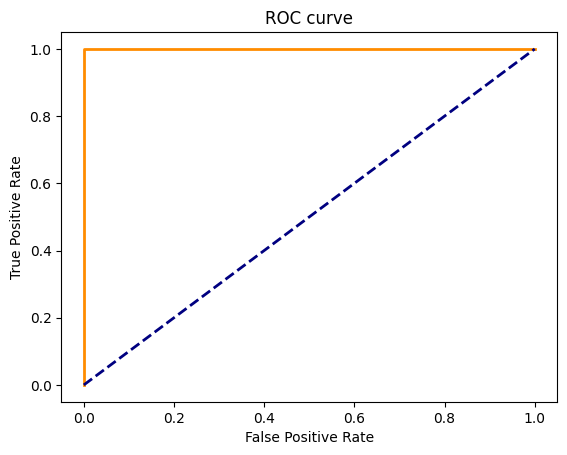

In [331]:
from sklearn.metrics import roc_curve

y_pred_proba = modelo_log.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='virginica')

plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### regresión logistica clases balanceadas

In [332]:
df_twoClass = df[df['species'] != 'setosa']
df_twoClass.species.value_counts()

species
versicolor    50
virginica     50
Name: count, dtype: int64

In [333]:
X = df_twoClass.drop(columns=['species'])
y = df_twoClass['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.95

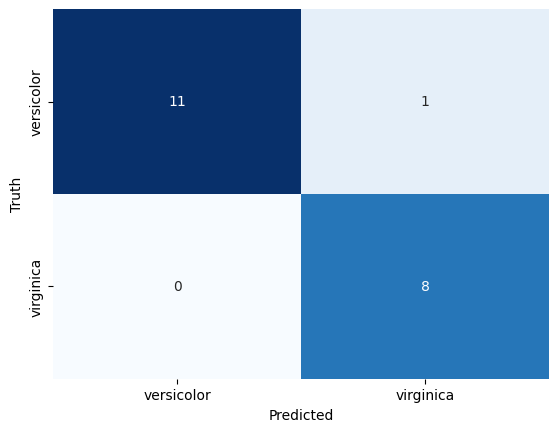

In [334]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['versicolor', 'virginica'], yticklabels=['versicolor', 'virginica'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Regresion Logistica multiclase

In [335]:
df_multiclass = df.copy()
df_multiclass.species.value_counts() 

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [336]:
X = df_multiclass.drop(columns=['species'])
y = df_multiclass['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

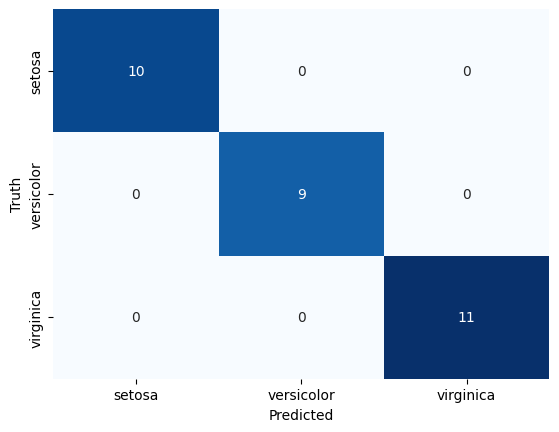

In [337]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [338]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [339]:
from sklearn.metrics import f1_score, precision_score, recall_score 

logistic_regresion_accuracy = accuracy_score(y_test, y_pred)
logistic_regresion_f1 = f1_score(y_test, y_pred, average='weighted')
logistic_regresion_precision = precision_score(y_test, y_pred, average='weighted')
logistic_regresion_recall = recall_score(y_test, y_pred, average='weighted')

df_metrics = pd.DataFrame({'Logistic Regression': [logistic_regresion_accuracy, logistic_regresion_f1, logistic_regresion_precision, logistic_regresion_recall]}, index=['Accuracy', 'F1', 'Precision', 'Recall'])
df_metrics



,Logistic Regression
Accuracy,1.0
F1,1.0
Precision,1.0
Recall,1.0


## K-Nearest Neighbors (KNN)

Clasifica un punto según sus vecinos más cercanos.

No hace suposiciones sobre la distribución de los datos.

Ejemplo gráfico:
El modelo KNN asigna una clase según los k puntos más cercanos. En este caso, el punto verde se clasifica como "Rojo" porque la mayoría de sus vecinos lo son.

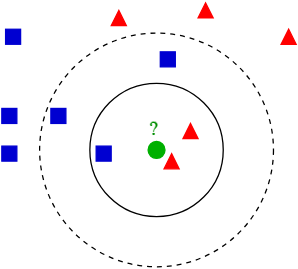


In [340]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

y_pred_knn = modelo_knn.predict(X_test)
print(f"Precisión KNN: {accuracy_score(y_test, y_pred_knn)}")

Precisión KNN: 1.0


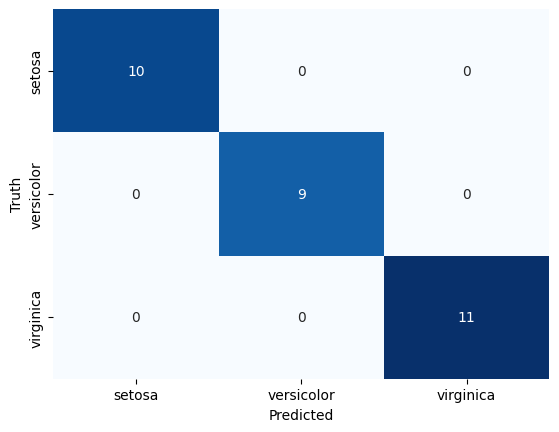

In [341]:
cm = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [342]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')

df_metrics['KNN'] = [knn_accuracy, knn_f1, knn_precision, knn_recall]
df_metrics

,Logistic Regression,KNN
Accuracy,1.0,1.0
F1,1.0,1.0
Precision,1.0,1.0
Recall,1.0,1.0


## Support Vector Machines (SVM)

Encuentra la mejor frontera de separación entre clases.

Usa márgenes máximos para mejorar la precisión.

Ejemplo gráfico:

SVM encuentra la mejor línea de separación (en 2D) o hiperplano (en dimensiones superiores). 

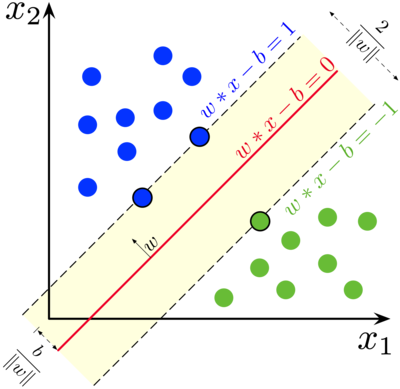

In [343]:
from sklearn.svm import SVC

modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train, y_train)

y_pred_svm = modelo_svm.predict(X_test)
print(f"Precisión SVM: {accuracy_score(y_test, y_pred_svm)}")

Precisión SVM: 1.0


In [344]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')

df_metrics['SVM'] = [svm_accuracy, svm_f1, svm_precision, svm_recall]
df_metrics

,Logistic Regression,KNN,SVM
Accuracy,1.0,1.0,1.0
F1,1.0,1.0,1.0
Precision,1.0,1.0,1.0
Recall,1.0,1.0,1.0


## Ejercicio
implementar modelos de clasificación con el siguiente DataSet

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [406]:
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [407]:
df_stroke.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [408]:
## equilibrio de clases
df_stroke = df_stroke.drop(df_stroke[df_stroke['stroke'] == 0].index[:4600])

df_stroke.stroke.value_counts()

stroke
0    261
1    249
Name: count, dtype: int64

In [409]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 510 non-null    int64  
 1   gender             510 non-null    object 
 2   age                510 non-null    float64
 3   hypertension       510 non-null    int64  
 4   heart_disease      510 non-null    int64  
 5   ever_married       510 non-null    object 
 6   work_type          510 non-null    object 
 7   Residence_type     510 non-null    object 
 8   avg_glucose_level  510 non-null    float64
 9   bmi                461 non-null    float64
 10  smoking_status     510 non-null    object 
 11  stroke             510 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 51.8+ KB


In [410]:
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,510.000000,510.000000,510.000000,510.000000,510.000000,461.000000,510.000000
mean,37637.366667,53.597098,0.160784,0.101961,118.364569,29.440347,0.488235
std,21575.580033,22.828717,0.367693,0.302894,54.725908,7.233444,0.500352
min,210.000000,0.320000,0.000000,0.000000,55.120000,13.700000,0.000000
25%,19623.750000,39.000000,0.000000,0.000000,78.725000,24.500000,0.000000
50%,37696.500000,58.000000,0.000000,0.000000,97.330000,28.400000,0.000000
75%,57127.750000,74.000000,0.000000,0.000000,142.607500,33.200000,1.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.000000


In [411]:
df_stroke.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  49
smoking_status        0
stroke                0
dtype: int64

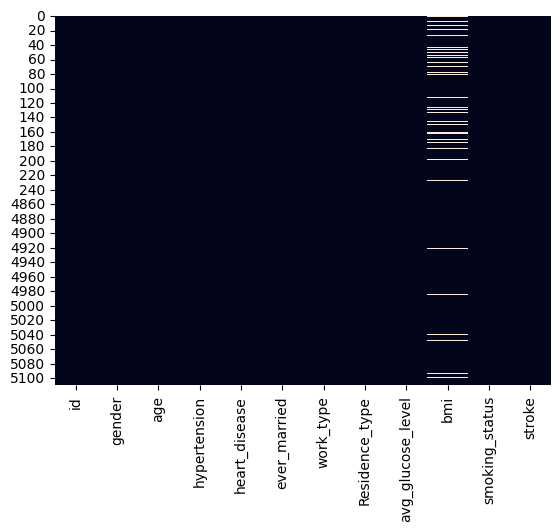

In [412]:
sns.heatmap(df_stroke.isnull(), cbar=False)
plt.show()

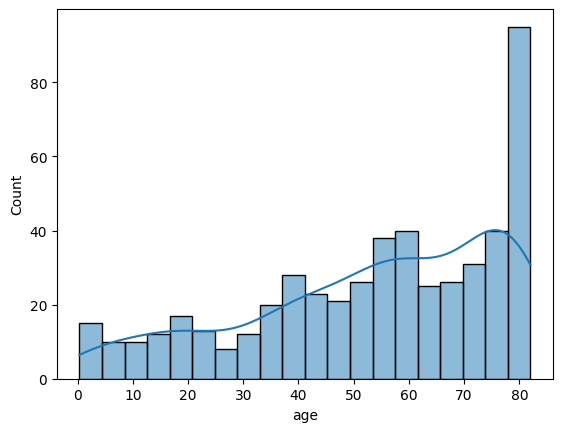

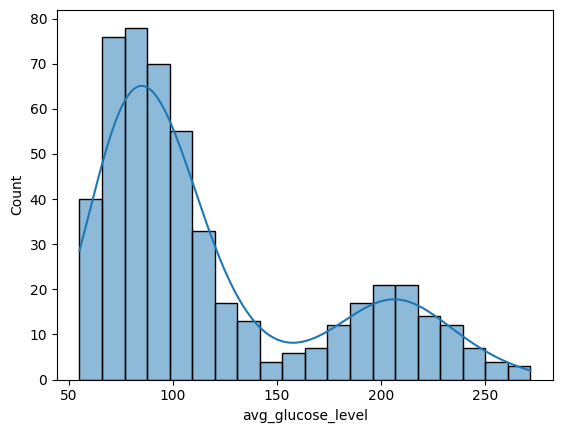

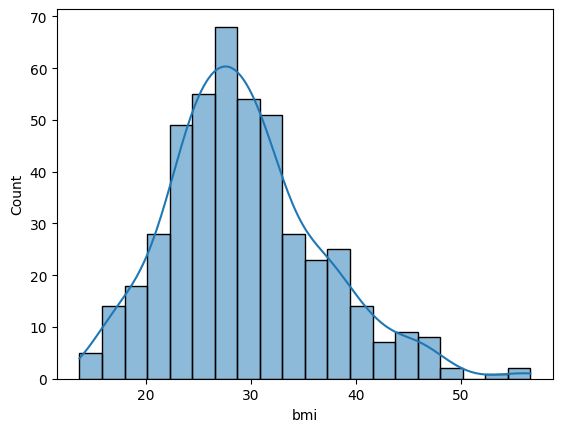

In [413]:
sns.histplot(df_stroke['age'], bins=20, kde=True)
plt.show()

sns.histplot(df_stroke['avg_glucose_level'], bins=20, kde=True)
plt.show()

sns.histplot(df_stroke['bmi'], bins=20, kde=True)
plt.show()


In [ ]:
df_stroke['bmi'] = df_stroke['bmi'].fillna(df_stroke['bmi'].mean()) ## podriamos usar el KNN imputer tambien


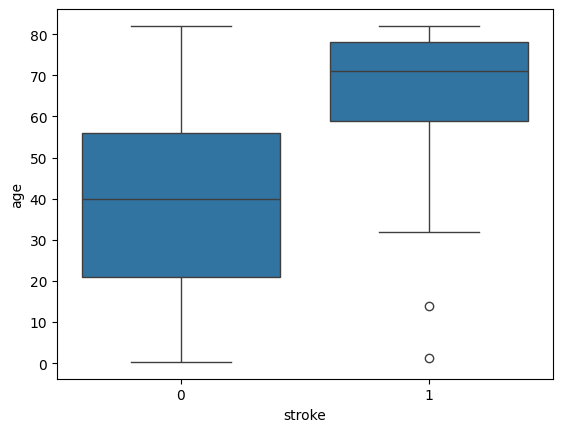

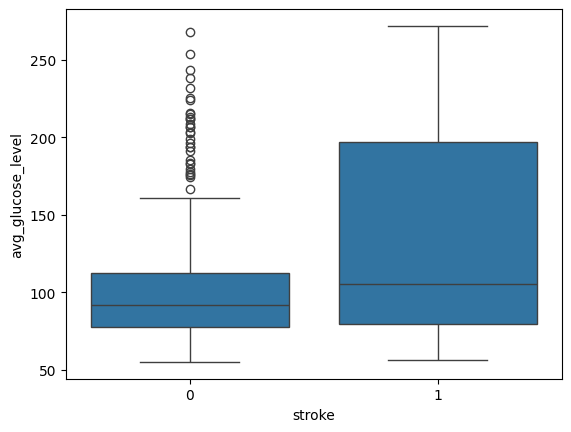

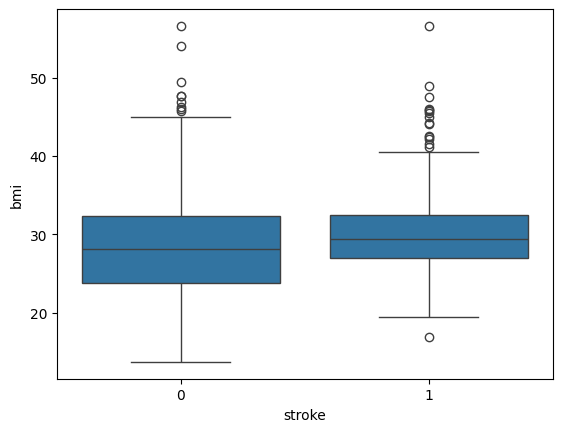

In [415]:
## generate some boxplots grouped by stroke

sns.boxplot(x='stroke', y='age', data=df_stroke)
plt.show()

sns.boxplot(x='stroke', y='avg_glucose_level', data=df_stroke)
plt.show()

sns.boxplot(x='stroke', y='bmi', data=df_stroke)
plt.show()



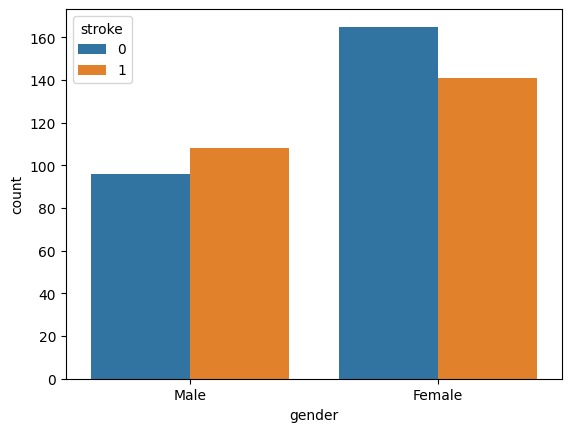

In [416]:
sns.countplot(x='gender', hue='stroke', data=df_stroke)
plt.show()

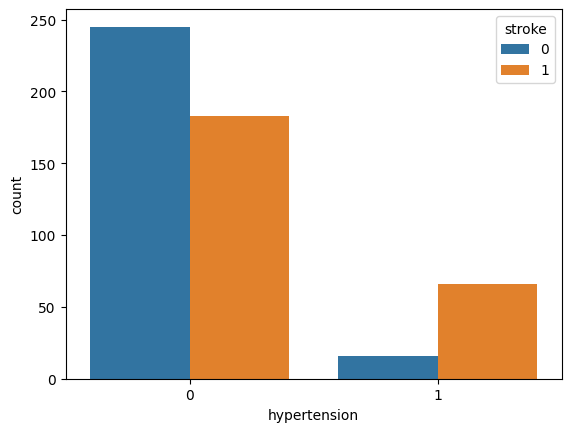

In [417]:
sns.countplot(x='hypertension', hue='stroke', data=df_stroke)
plt.show()

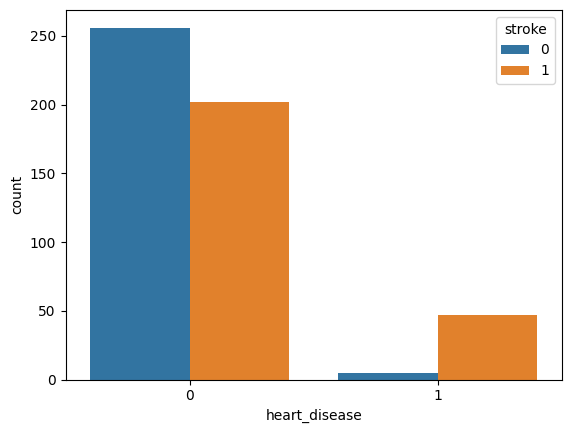

In [418]:
sns.countplot(x='heart_disease', hue='stroke', data=df_stroke)
plt.show()

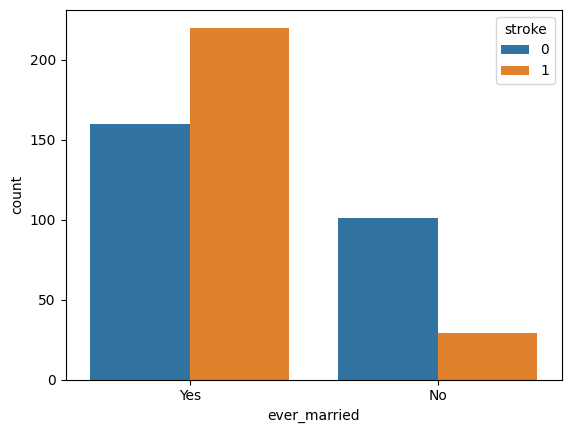

In [419]:
sns.countplot(x='ever_married', hue='stroke', data=df_stroke)
plt.show()

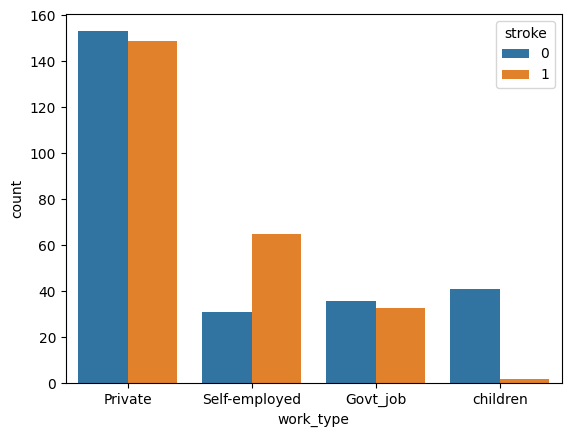

In [420]:
sns.countplot(x='work_type', hue='stroke', data=df_stroke)
plt.show()

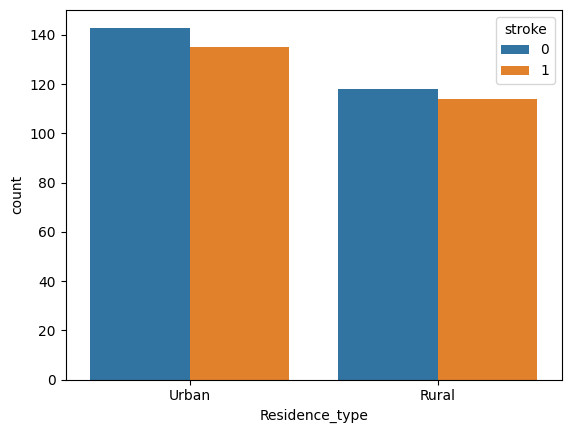

In [421]:
sns.countplot(x='Residence_type', hue='stroke', data=df_stroke)
plt.show()

In [422]:
df_stroke = df_stroke[df_stroke.gender != 'Other']

In [423]:
df_stroke = pd.get_dummies(df_stroke, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
df_stroke.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,True,True,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,29.440347,1,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,True,True,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,False,True,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,False,True,False,True,False,False,False,True,False


## Regresion logistica para Stroke

Precisión: 0.7941176470588235


C:\Users\Thor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


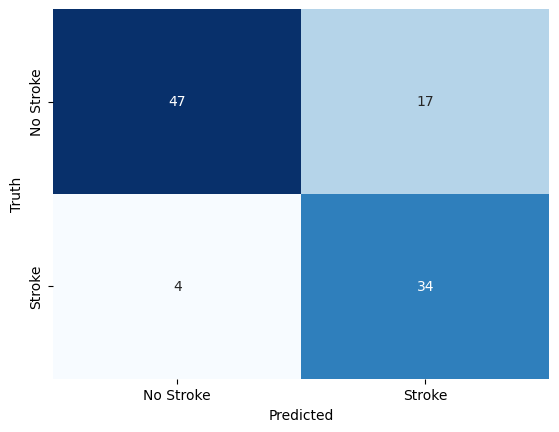

In [434]:
### create logistic regresion

X = df_stroke.drop(columns=['id', 'stroke'])
y = df_stroke['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Precisión: {accuracy_score(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [435]:
print (classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke']))

              precision    recall  f1-score   support

   No Stroke       0.92      0.73      0.82        64
      Stroke       0.67      0.89      0.76        38

    accuracy                           0.79       102
   macro avg       0.79      0.81      0.79       102
weighted avg       0.83      0.79      0.80       102



In [436]:
logistic_accuracy = accuracy_score(y_test, y_pred)
logistic_f1 = f1_score(y_test, y_pred)
logistic_precision = precision_score(y_test, y_pred)
logistic_recall = recall_score(y_test, y_pred)

df_metrics = pd.DataFrame({'Logistic Regression': [logistic_accuracy, logistic_f1, logistic_precision, logistic_recall]}, index=['Accuracy', 'F1', 'Precision', 'Recall'])  
df_metrics

,Logistic Regression
Accuracy,0.794118
F1,0.764045
Precision,0.666667
Recall,0.894737


Text(0.5, 1.0, 'ROC curve')

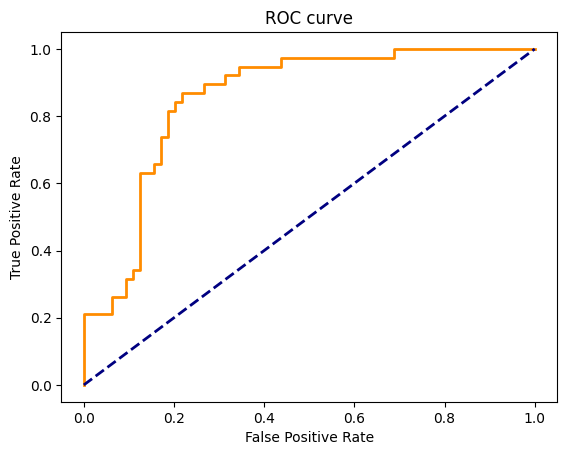

In [437]:
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)

plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

# KNN para Stroke

Precisión KNN: 0.7549019607843137


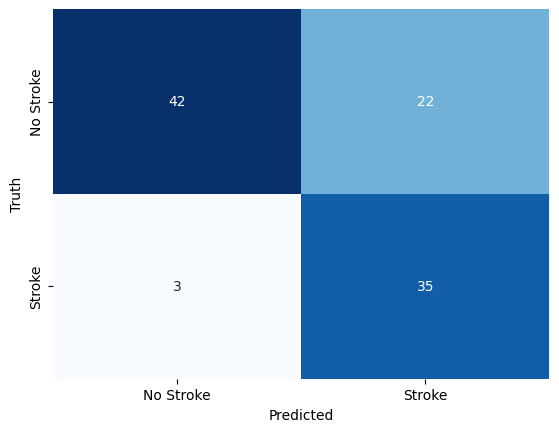

In [438]:

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)
print(f"Precisión KNN: {accuracy_score(y_test, y_pred_knn)}")

cm = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()



In [439]:
print (classification_report(y_test, y_pred_knn, target_names=['No Stroke', 'Stroke']))

              precision    recall  f1-score   support

   No Stroke       0.93      0.66      0.77        64
      Stroke       0.61      0.92      0.74        38

    accuracy                           0.75       102
   macro avg       0.77      0.79      0.75       102
weighted avg       0.81      0.75      0.76       102



In [440]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)

df_metrics['KNN'] = [knn_accuracy, knn_f1, knn_precision, knn_recall]
df_metrics

,Logistic Regression,KNN
Accuracy,0.794118,0.754902
F1,0.764045,0.736842
Precision,0.666667,0.614035
Recall,0.894737,0.921053


### SVM para Stroke

Precisión SVM: 0.7941176470588235


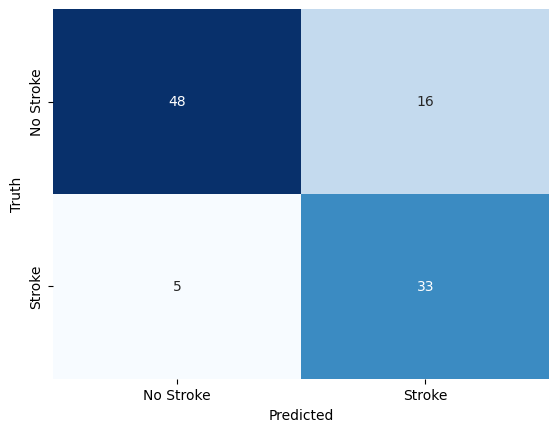

In [ ]:

model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)
print(f"Precisión SVM: {accuracy_score(y_test, y_pred_svm)}")

cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [442]:

print (classification_report(y_test, y_pred_svm, target_names=['No Stroke', 'Stroke']))

              precision    recall  f1-score   support

   No Stroke       0.91      0.75      0.82        64
      Stroke       0.67      0.87      0.76        38

    accuracy                           0.79       102
   macro avg       0.79      0.81      0.79       102
weighted avg       0.82      0.79      0.80       102



In [443]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)

df_metrics['SVM'] = [svm_accuracy, svm_f1, svm_precision, svm_recall]
df_metrics

,Logistic Regression,KNN,SVM
Accuracy,0.794118,0.754902,0.794118
F1,0.764045,0.736842,0.758621
Precision,0.666667,0.614035,0.673469
Recall,0.894737,0.921053,0.868421


# ¿Cómo podemos mejorar estos valores?

- normalizar los valores
- seleccionar las mejores columnas o caracteristicas (SelectKBest)
- implementar GridSearch
- Balanceo de clases con SMOTE (no simplemente eliminar)